In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('../../data/processed/proposal_exploration/neighborhood_traffic_labor_force.csv')
data


,neighbourhood_id,total_traffic_volume,total_median_income,labor_force_amount
0,1,853529,33600,18405
1,2,212521,29600,14360
2,3,89635,32800,4990
3,4,101721,33600,5305
4,5,64063,34400,4425
...,...,...,...,...
153,170,1525153,44000,8620
154,171,571144,41200,14040
155,172,557818,38000,7460
156,173,75249,46000,10870


In [3]:
# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['total_traffic_volume', 'labor_force_amount']])

# Determine the optimal number of clusters (example: using Elbow method or silhouette analysis)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming  3 clusters for demonstration
kmeans.fit(data_scaled)

# Assign each neighborhood to a cluster
data['cluster'] = kmeans.labels_

# Analyze the clusters
print(data.groupby('cluster').mean())

         neighbourhood_id  total_traffic_volume  total_median_income  \
cluster                                                                
0               99.666667         826394.133333         44566.666667   
1              103.307692         571714.512821         41792.307692   
2               77.550562         189383.000000         41200.000000   

         labor_force_amount  
cluster                      
0               9362.833333  
1              14663.333333  
2               7479.494382  


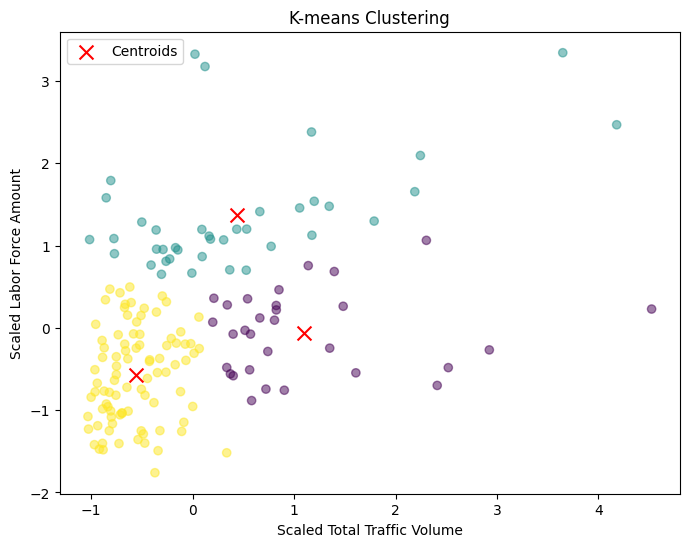

In [8]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for the first two features with cluster assignment
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Scaled Total Traffic Volume')
plt.ylabel('Scaled Labor Force Amount')
plt.title('K-means Clustering')
plt.legend()
plt.show()